pygame 2.1.2 (SDL 2.0.18, Python 3.8.5)
Hello from the pygame community. https://www.pygame.org/contribute.html
[(0, 0), (100, 0), (200, 0), (300, 0), (400, 0), (500, 0.0), (600, 0.0), (700, 0.0), (800, 1.0), (900, 2.0), (1000, 0), (1100, 0), (1200, 0), (1300, 0.0), (1400, 1.0), (1500, 1.0), (1600, 1.5), (1700, 2.667), (1800, 3.0), (1900, 2.5), (2000, 1.0), (2100, 1.0), (2200, 1.375), (2300, 1.222), (2400, 1.444), (2500, 1.417), (2600, 1.385), (2700, 1.25), (2800, 0.938), (2900, 0.95), (3000, 0.722), (3100, 0.778), (3200, 0.571), (3300, 0.286), (3400, 0.333), (3500, 0.462), (3600, 0.545), (3700, 0.455), (3800, 0.143), (3900, 0.375), (4000, 0.5), (4100, 0.571), (4200, 0.875), (4300, 0.714), (4400, 0.75), (4500, 0.667), (4600, 0.667), (4700, 0.6), (4800, 0.556), (4900, 0.5), (5000, 0.5), (5100, 0.0), (5200, 0.0), (5300, 0.0)]


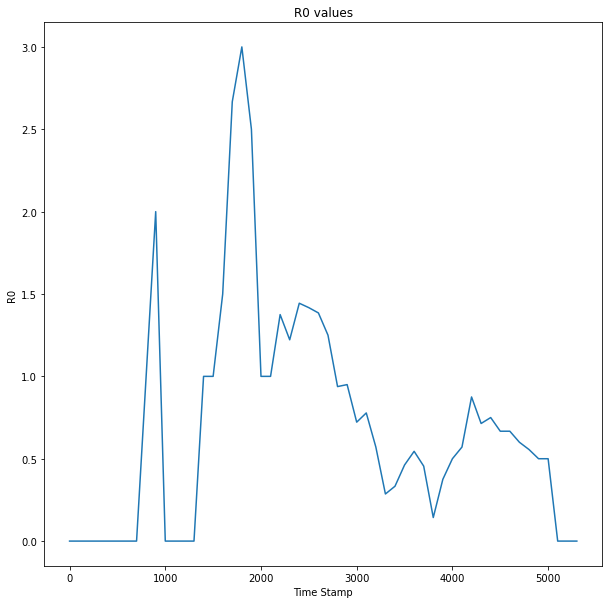

[(0, 1), (100, 1), (200, 1), (300, 1), (400, 1), (500, 1), (600, 1), (700, 1), (800, 2), (900, 5), (1000, 4), (1100, 4), (1200, 4), (1300, 4), (1400, 6), (1500, 6), (1600, 8), (1700, 12), (1800, 14), (1900, 17), (2000, 17), (2100, 18), (2200, 20), (2300, 21), (2400, 27), (2500, 31), (2600, 32), (2700, 31), (2800, 28), (2900, 33), (3000, 29), (3100, 28), (3200, 25), (3300, 22), (3400, 20), (3500, 19), (3600, 17), (3700, 17), (3800, 13), (3900, 16), (4000, 15), (4100, 15), (4200, 17), (4300, 16), (4400, 14), (4500, 14), (4600, 11), (4700, 11), (4800, 9), (4900, 6), (5000, 4), (5100, 3), (5200, 2), (5300, 1)]


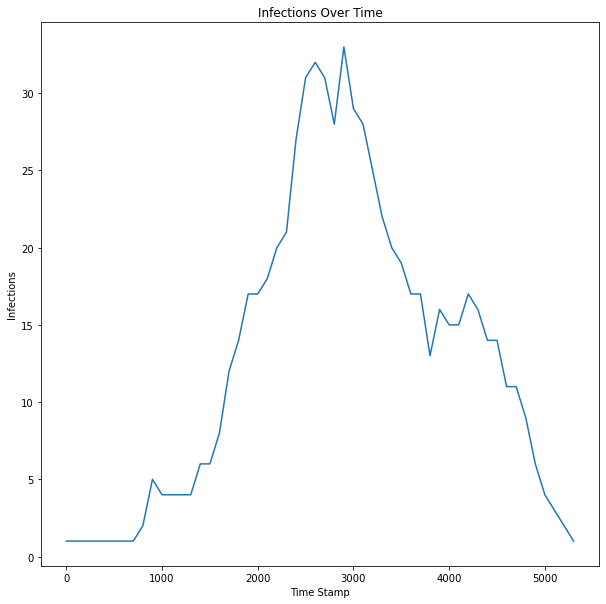

HOMES:
24+ 96- 48- 72+ 0+ | 3/5
1+ 73+ 25+ 97+ 49+ | 5/5
2+ 98+ 74+ 50+ 26+ | 5/5
3+ 51+ 27+ 75+ | 4/4
4- 28+ 52+ 76- | 2/4
5- 53+ 29+ 77+ | 3/4
6+ 30+ 54+ 78+ | 4/4
55+ 79+ 7+ 31+ | 4/4
32+ 56+ 80+ 8+ | 4/4
57- 81+ 9+ 33+ | 3/4
34- 82+ 10- 58- | 1/4
35- 59- 11- 83- | 0/4
36- 84+ 12- 60+ | 2/4
37- 61- 13- 85- | 0/4
14+ 86+ 38- 62- | 2/4
15+ 39- 63- 87+ | 2/4
40- 88+ 16+ 64+ | 3/4
17+ 89+ 41- 65+ | 3/4
18+ 42+ 90+ 66+ | 4/4
19+ 67+ 43+ 91+ | 4/4
44+ 92+ 20+ 68+ | 4/4
21- 69- 93+ 45- | 1/4
22+ 94+ 70+ 46- | 3/4
23- 47- 71+ 95+ | 2/4


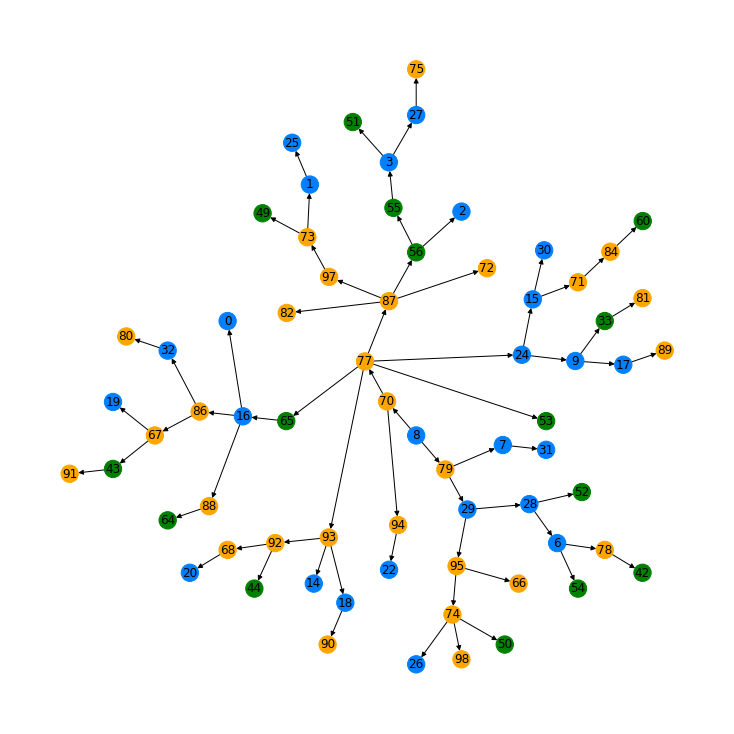

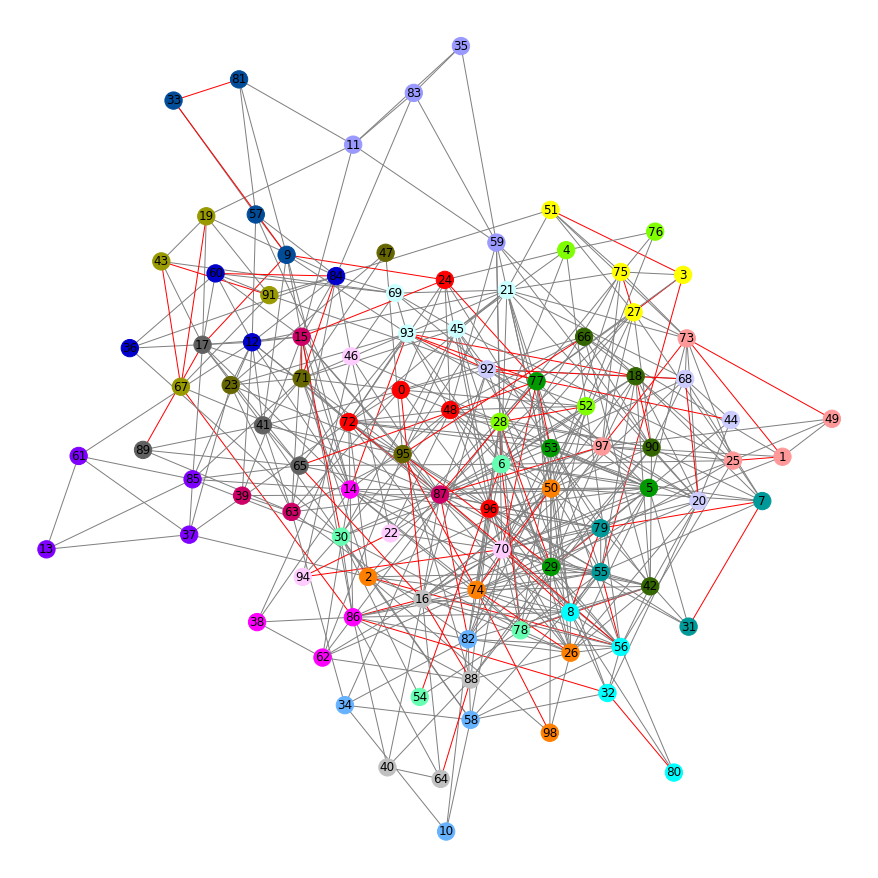

error: video system not initialized

In [1]:
import pygame
import random
import networkx as nx
import matplotlib.pyplot as plt
from enum import Enum
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

# Propagation/Cascading Network
G=nx.DiGraph(name='G')
# Trajectory Network | Tracks nodes that came within close proximity at one point
P=nx.Graph(name='P')
# random.seed(534543642221)
random.seed(534543642223)


# constants
WIDTH, HEIGHT = 1200,900
WIN = pygame.display.set_mode([WIDTH, HEIGHT])
WHITE = (255,255,255)
FPS = 100
NODES = 99
NODE_SIZE = 20
INITIAL_INFECTIONS = 1
INITIAL_INFECTION = 8
RECOVERY_TIME = 750
IMMUNITY = 0.95
TS = 850
RETURNING_HOME = 150
GOING_PUBLIC = 20
pubsurfs = [(300,225),(700,225),(300,475),(700,475)]
graphstamps = []

class Vulnerability(Enum):
#     LOW = [(10,13),(0.97,1), (500,100), (0,255,0)]
#     MEDIUM = [(14,17),(0.93,0.97), (750,150), (0,128,255)]
#     HIGH = [(18,21),(0.9,0.93), (1000,300),(255,128,0)]
    LOW = [(10,13),(0.97,1), (700,100), (0,255,0)]
    MEDIUM = [(14,17),(0.93,0.97), (950,150), (0,128,255)]
    HIGH = [(18,21),(0.9,0.93), (1200,300),(255,128,0)]
    
    
class State(Enum):
    SUSCEPTIBLE = 1
    INFECTIOUS = 2
    RECOVERED = 3

def get_vulnerability(i):

    p = random.random()
    if(i<33):
        return Vulnerability.MEDIUM
    elif(i<66):
        return Vulnerability.LOW
    else:
        return Vulnerability.HIGH


class Node(pygame.sprite.Sprite):
    def __init__(self, pos_x,pos_y,id, home):
        super().__init__()
        self.id = id
        self.vulnerability = get_vulnerability(self.id)
        self.width = random.randint(self.vulnerability.value[0][0],self.vulnerability.value[0][1])
        self.image = pygame.Surface([self.width, self.width])
        self.image.fill(self.vulnerability.value[3])
        # self.image.fill((0,0,255))
        self.rect = self.image.get_rect()
        self.rect.center = [pos_x, pos_y]
        self.home = home
        self.public_dest = random.randint(0,3)
#         self.destination = (random.randint(pubsurfs[self.public_dest][0],
#                                            (pubsurfs[self.public_dest][0]+100)),
#                             random.randint(pubsurfs[self.public_dest][1],
#                                            (pubsurfs[self.public_dest][1]+100)))
        self.destination = (random.randint(self.home[0],(self.home[0]+100)),random.randint(self.home[1],(self.home[1]+100)))
        self.reached_x = False
        self.reached_y = False
        self.state = State.SUSCEPTIBLE
#         self.is_home = (random.randint(0,3) % 3 )== 0
        self.is_home = True
#         self.public_dest = -1

#         self.public_dest = pub

        self.days_infected = -1
        self.immunity = random.uniform(self.vulnerability.value[1][0],self.vulnerability.value[1][1])
        self.recovery_time = random.randint(self.vulnerability.value[2][0]-self.vulnerability.value[2][1],self.vulnerability.value[2][0]+self.vulnerability.value[2][1])

    
    def infect(self, received_from):
        if self.state == State.SUSCEPTIBLE:
            self.state = State.INFECTIOUS
#             self.infected = True
            self.image.fill((255,0,0))
            
            if received_from == None:
                G.add_node(self.id, data = self)
                
            else:
                if not G.has_node(received_from.id):
                    G.add_node(received_from.id, data = received_from)
                if not G.has_node(self.id):
                    G.add_node(self.id, data = self)
                G.add_edge(received_from.id,self.id)
                P[received_from.id][self.id]['color'] = 'red'
            
    
    def recover(self):
        if self.state == State.INFECTIOUS:
            self.state = State.RECOVERED
#             self.infected = False
#             self.recovered = True
            self.image.fill((0,0,0))
            self.immunity = 2

        

        
        
pygame.init()

all_nodes = []


# CREATE SURFACE

homes = []


home = pygame.Surface([100,100])
home.fill((140, 145, 140))

public = pygame.Surface([200,200])
public.fill((211, 222, 118))


y=60
x=60

while x <= 1040:
    homes.append((x,60))
    homes.append((x,740))
    x+=163
while y < 610:
    y+=110
    homes.append((60,y))
    homes.append((1040,y))
    
def main():
    
    # variable initialization
    t = 0
    nodes = []
    node_group = pygame.sprite.Group()
    infected_nodes = []
    recovered_nodes = []
    i_nodes = []
    r0 = []
    infections_ts = []
    
#     CREATE INITIAL NODES
    for i in range(NODES):
        h = i % len(homes)
        h = homes[h]
        obj = Node(random.randint(h[0],(h[0]+100)),random.randint(h[1],(h[1]+100)),i, h)
#         if i < INITIAL_INFECTIONS:
        if i >= INITIAL_INFECTION and i < INITIAL_INFECTION + INITIAL_INFECTIONS:
            obj.infect(None)
            infected_nodes.append(obj)
            i_nodes.append(obj.id)
        node_group.add(obj)
        nodes.append(obj)

    
#     ARANGE WHICH NODES ARE ASSIGNED TO WHICH HOME
#     
# 
# 
    
    running = True
    clock = pygame.time.Clock()
    all_nodes = nodes
    
    
# TIMESTAMP DATA TRACKING
    
    def save_g(time):
        color_map = []
        for node in G:       
            node = G.nodes[node]['data']
            if node.recovered:
                color_map.append('green')
            else:
                color_map.append('red')
        pos = graphviz_layout(G, prog="twopi")
        plt.figure(figsize=(10,10))
        print(time)
        plt.title('t = '+str(t)+' | R0 = ' + str(round(get_R0(),3)))
        nx.draw(G,pos, node_color=color_map, with_labels = True)
#         nx.draw(G, node_color=color_map, with_labels = True)
#         nx.draw(G,pos, node_color=color_map)
        plt.savefig('images/propagation'+str(int(time))+'.png')
        plt.clf()
        
    def r0_graph():
        print(r0)
        ts = [x for x, y in r0]
        data = [y for x, y in r0]
        (ax1, ax2) = plt.subplots(ncols=1, figsize=(10, 10))
        plt.plot(ts,data)
        plt.title("R0 values")
        ax2.set_xlabel('Time Stamp')
        ax2.set_ylabel('R0')
        plt.savefig("images/r0.png")
        plt.show()
    def infections_graph():
        print(infections_ts)
        ts = [x for x, y in infections_ts]
        data = [y for x, y in infections_ts]
        (ax1, ax2) = plt.subplots(ncols=1, figsize=(10, 10))
        plt.plot(ts,data)
        plt.title("Infections Over Time")
        ax2.set_xlabel('Time Stamp')
        ax2.set_ylabel('Infections')
        plt.savefig("images/infections.png")
        plt.show()
    
    def graphts():
        g = G.copy()
        for u in g:
            g.nodes[u]['state']=g.nodes[u]['data'].state
        graphstamps.append((g,P.copy()))
    
    while running:
        
#         STOP RUNNING IF THERE IS NO MORE INFECTED NODES

        if len(infected_nodes) == 0:
#             save_g(t)
            r0_graph()
            infections_graph()
            graphts()
            running = False
            pygame.quit()
            post_quit()
            exit()
            
        if (t % TS) == 0:
            graphts()
            
            
        if (t % 100) == 0:
            r0.append((t,round(get_R0(),3)))
            infections_ts.append((t,len(infected_nodes)))
        t+=1
        
        # event loop
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                running = False
                pygame.quit()
                post_quit()
                exit()
        
        def proximity_add_edge(n1,n2):
            if n1.id==n2.id:
                return
            if not P.has_edge(n1.id,n2.id):
                if not P.has_node(n1.id):
                    P.add_node(n1.id, data = n1)
                if not P.has_node(n2.id):
                    P.add_node(n2.id, data = n2)
                P.add_edge(n1.id,n2.id)
                P[n1.id][n2.id]['weight'] = 1
                P[n1.id][n2.id]['color'] = 'grey'
                
            elif P.has_edge(n1.id,n2.id):
                P[n1.id][n2.id]['weight'] += 1
                


        
        # collisions and infections
        to_infect = []
        
        for node in nodes:
            collisions = pygame.sprite.spritecollide(node, node_group, False)
            if len(collisions) > 1:
                for i in range(len(collisions)):
                    proximity_add_edge(node,collisions[i])
                    # add edge to proximity graph
        
        for infected in infected_nodes:
            collisions = pygame.sprite.spritecollide(infected, node_group, False)
            if len(collisions) > 1:
                for i in range(len(collisions)):
                    # add edge to proximity graph
                    if (collisions[i].state == State.SUSCEPTIBLE) and random.random() >= collisions[i].immunity:
                        to_infect.append((infected,collisions[i]))
        

                    


        for n in to_infect:
            n[1].infect(n[0])
            infected_nodes.append(n[1])
            i_nodes.append(n[1].id)
        # print(i_nodes)

        # node recovery
        for n in infected_nodes:
            if n.days_infected >= n.recovery_time:
                n.recover()
                infected_nodes.remove(n)
                recovered_nodes.append(n)
            else:
                n.days_infected += 1

        # graphics
        WIN.fill(WHITE)
        
#         INITIAL HOME PLACEMENT
        y=60
        x=60
        while x <= 1040:

            WIN.blit(home, (x,60))
            WIN.blit(home, (x,740))
            x+=163
        while y < 610:
            y+=110
            WIN.blit(home, (60,y))
            WIN.blit(home, (1040,y))
        
        for i in range(len(pubsurfs)):
            WIN.blit(public,pubsurfs[i])

        
        for n in node_group:
            if n.rect.center[0] != n.destination[0] and n.reached_x==False:
                x = n.rect.center[0]
                y = n.rect.center[1]
                h = n.home
                direction = (n.destination[0]-n.rect.center[0])/abs(n.destination[0]-n.rect.center[0])
#                 inPublic = ((x > 160) and (x < 1040)) and ((y >160) and (y<740))
                inPublic = ((x > 171) and (x < 1029)) and ((y >171) and (y<729))
#                 inHousesX = ((x + direction) <= 160) or  ((x + direction) >= 1040)
                inHousesX = ((x + direction) <= 171) or  ((x + direction) >= 1029)
#                 canEnter = ((y > (h[1] - 5)) and (y < (h[1] + 105)))
                canEnter = ((y > (h[1] - 13)) and (y < (h[1] + 113)))
                
                if inPublic and inHousesX:
                    if canEnter:
                        n.rect.right += direction
                else:
                    n.rect.right += direction
            else:
                n.reached_x = True
            if n.rect.center[1] != n.destination[1] and n.reached_y==False:
                x = n.rect.center[0]
                y = n.rect.center[1]
                h = n.home
                direction = (n.destination[1]-n.rect.center[1])/abs(n.destination[1]-n.rect.center[1])
#                 inPublic = ((x > 160) and (x < 1040)) and ((y >160) and (y<740))
                inPublic = ((x > 171) and (x < 1029)) and ((y >171) and (y<729))
#                 inHousesY = ((y + direction) <= 160) or  ((y + direction) >= 740)
                inHousesY = ((y + direction) <= 171) or  ((y + direction) >= 729)
#                 canEnter = ((x > (h[0] - 5)) and (x < (h[0] + 105)))
                canEnter = ((x > (h[0] - 13)) and (x < (h[0] + 113)))
                
                if inPublic and inHousesY:
                    if canEnter:
                        n.rect.bottom += direction
                else:
                    n.rect.bottom += direction
                    
                
#                 n.rect.bottom += direction
            else:
                n.reached_y = True
            if n.reached_x and n.reached_y:
#                 n.destination = (random.randint(0,WIDTH),random.randint(0,HEIGHT))
                l = 100
                if n.is_home:
                    p = random.randint(0,1000)
#                 chance of leaving home
                    if p <= GOING_PUBLIC:
                        n.is_home = False
                        l = 200
#                         n.public_dest = random.randint(0,3)
                        h = pubsurfs[n.public_dest]
                    else:
                        h = n.home
                        l = 100
                else:
                    p = random.randint(0,1000)
#                     chance of returning home
                    if p <= RETURNING_HOME:
                        n.is_home = True
                        l = 100
                        h = n.home
                    else:
                        l=200
                        h = pubsurfs[n.public_dest]
                n.destination = (random.randint(h[0],(h[0]+l)),random.randint(h[1],(h[1]+l)))
                n.reached_x = n.destination[0] == n.rect.center[0]
                n.reached_y = n.destination[1] == n.rect.center[1]

        node_group.draw(WIN)
        pygame.display.flip()
        clock.tick(FPS)
        
        
        
        
        
        
        
        
        
        
#  ################################################################################################################
###################################################################################################################
#  ################################################################################################################
###################################################################################################################        
#  ################################################################################################################
###################################################################################################################        
        
        
        
        
        
        
        
        

def post_quit():
    percent_infected()
    draw_G()
    draw_P()
#     create_tsgraphs()
#     r0 = get_R0()
#     print_vulnerabilities(G)
#     print_vulnerabilities(P)
#     print('R0 = ' + str(round(r0,2)))
#     cd = clustering_degree()
#     print('Average Degree for High Vulnerability: ' + str(avg_degree(cd['h'])))
#     print('Average Clustering for High Vulnerability: ' + str(avg_clustering(cd['h'])))
#     print('Average Degree for Medium Vulnerability: ' + str(avg_degree(cd['m'])))
#     print('Average Clustering for Medium Vulnerability: ' + str(avg_clustering(cd['m'])))
#     print('Average Degree for Low Vulnerability: ' + str(avg_degree(cd['l'])))
#     print('Average Clustering for Low Vulnerability: ' + str(avg_clustering(cd['l'])))
#     print(G.number_of_nodes())
#     print(G.number_of_edges())
#     print(P.number_of_nodes())
#     print(P.number_of_edges())
#     print("Global Clustering for gcer1: "+str(round(nx.average_clustering(G),3)))
#     print("Global Clustering for gcer1: "+str(round(nx.average_clustering(P),3)))
#     print((G.number_of_edges())/G.number_of_nodes())
#     print((2*P.number_of_edges())/99)
#     girvan_newman()
    
#     f = open("graphP.txt", "w")
#     for u,v in P.edges():
#         col = P[u][v]['color']
#         w = P[u][v]['weight']
#         f.write(str(u)+'-'+str(v)+'-'+str(w)+'-'+str(col)+'\n')

def create_tsgraphs():
    i=-1
    for x in graphstamps:
        i+=1
        g = x[0]
        p = x[1]
        fp = open("images/graphP"+ str((TS*i)) +".txt", "w")
        fg = open("images/graphG"+ str((TS*i)) +".txt", "w")
        for u,v in p.edges():
            col = p[u][v]['color']
            w = p[u][v]['weight']
            fp.write(str(u)+'-'+str(v)+'-'+str(w)+'-'+str(col)+'\n')
            
        for u,v in g.edges():
            su = g.nodes[u]['state']
            sv = g.nodes[v]['state']
            fg.write(str(u)+'-'+str(v)+'-'+str(su)+'-'+str(sv)+'\n')
    fp.close()
    fg.close()

def percent_infected():
    print('HOMES:')
    home_nodes = get_homes()
    for h in home_nodes:
        home_str = ''
        infected = 0
        for n in h:
            was_infected = (n.state == State.RECOVERED)
            if was_infected:
                home_str += (str(n.id) + '+ ')
                infected += 1
            else:
                home_str += (str(n.id) + '- ')
        print(home_str + '| ' + str(infected) + '/' + str(len(h)))
    
def get_homes():
    nodes_per_home = []
    for h in homes:
        home_nodes = []
        for n in P.nodes:
            n = P.nodes[n]['data']
            if n.home == h:
                home_nodes.append(n)
        nodes_per_home.append(home_nodes)
    return nodes_per_home

    

def avg_clustering(a):
    i = 0
    c = 0
    for n in a:
        n = n[0]
        i += 1
        c += n
    if i == 0:
        return -1
    return round(c/i,4)

def avg_degree(a):
    i = 0
    d = 0
    for n in a:
        n = n[1]
        if n < 0:
            continue
        i += 1
        d += n
    if i == 0:
        return -1
    return round(d/i,4)


def draw_G():
    color_map = []
    for node in G:       
        node = G.nodes[node]['data']
        if node.vulnerability == Vulnerability.HIGH:
            color_map.append('orange')
        elif node.vulnerability == Vulnerability.MEDIUM:
            color_map.append('#0080FF')
        else:
            color_map.append('green')
    pos = graphviz_layout(G, prog="twopi")
    plt.figure(figsize=(10,10))
    nx.draw(G,pos, node_color=color_map, with_labels = True)
    # nx.draw(G, node_color=color_map, with_labels = True)
    plt.savefig("images/propagation.png")
    plt.show()

def draw_P():
    color_map = []
    color_options = ['#FF0000','#FF9999','#FF8000','#FFFF00','#80FF00','#009900','#66FFB2','#009999','#00FFFF','#004C99',
              '#66B2FF','#9999FF','#0000CC','#7F00FF','#FF00FF','#CC0066','#C0C0C0','#606060','#336600','#999900',
              '#CCCCFF','#CCFFFF','#FFCCFF','#666600']
    for node in P:       
        node = P.nodes[node]['data']
        nid = node.id
        mod = nid % 24
#         color_map.append(1000*mod)
        color_map.append(color_options[mod])
#         if node.vulnerability == Vulnerability.HIGH:
#             color_map.append('orange')
#         elif node.vulnerability == Vulnerability.MEDIUM:
#             color_map.append('#0080FF')
#         else:
#             color_map.append('green')
    colors = [P[u][v]['color'] for u,v in P.edges()]
    plt.figure(figsize=(12,12))
    pos = graphviz_layout(P, prog="fdp")
    nx.draw(P,pos, node_color=color_map, edge_color=colors, with_labels = True)
    plt.savefig("images/proximity.png")
    plt.show()



def get_R0():
    ln = 0 
    e = 0
    ni = 0
    for n in G.nodes:
        if float(G.nodes[n]['data'].days_infected/G.nodes[n]['data'].recovery_time)<0.5 and G.nodes[n]['data'].state == State.INFECTIOUS:
            ni+=1
            ln+=1
#         else:
        elif G.nodes[n]['data'].state == State.INFECTIOUS:
            ni+=1
            e += G.out_degree(n)
    if ((ni - ln)) ==0:
        return 0
#     return G.number_of_edges()/(G.number_of_nodes())
#     return G.number_of_edges()/(G.number_of_nodes() - ln)
#     print('e: ' + str(e))
#     print('ni: ' + str(ni))
#     print('ln: ' + str(ln))
#     print('e/(ni - ln): ' +str(round(e/(ni - ln),3)))
    return e/(ni - ln)

def clustering_degree():
    h = []
    m = []
    l = []
    cluster = nx.clustering(P)
#     print(cluster)
    for node in P:       
        node = P.nodes[node]['data']
        c = cluster[node.id]
        d = -1
        try:
            d = G.out_degree(node.id)
        except:
            d = -1

        if node.vulnerability == Vulnerability.HIGH:
            h.append((c,d))
        elif node.vulnerability == Vulnerability.MEDIUM:
            m.append((c,d))
        else:
            l.append((c,d))
    print('High Vulnerability Proximity Clustering & Propagation Degree:')
    for n in h:
        print('clustering: ' + str(n[0]) + ' | degree: ' + str(n[1]))
    print('Medium Vulnerability Proximity Clustering & Propagation Degree:')
    for n in m:
        print('clustering: ' + str(n[0]) + ' | degree: ' + str(n[1]))
    print('Low Vulnerability Proximity Clustering & Propagation Degree:')
    for n in l:
        print('clustering: ' + str(n[0]) + ' | degree: ' + str(n[1]))
    return {'h':h,'m':m,'l':l}

def print_vulnerabilities(G):
    h = 0
    m = 0
    l=0

    for n in G:
#         print(G.nodes[n]['data'].vulnerability)
        if G.nodes[n]['data'].vulnerability == Vulnerability.HIGH:
            h += 1
        elif G.nodes[n]['data'].vulnerability == Vulnerability.MEDIUM:
            m+= 1
        else:
            l += 1
    g_name = ' for infected nodes:'
    if G.name == 'P':
        g_name = ' for all nodes in model: '
    print('Vulnerabilities' + g_name)
    print('number of high vulnerability nodes: ' + str(h))
    print('number of medium vulnerability nodes: ' + str(m))
    print('number of low vulnerability nodes: ' + str(l))
    print('\n')
    

# def girvan_newman():   
#     P2 = nx.Graph()
#     ebP = nx.edge_betweenness_centrality(P, weight="weight")
#     ebP = sorted(ebP.items(), key=lambda pair: -pair[1])
#     for e in P.edges:
#         p1 = P.nodes[e[0]]['data']
#         p2 = P.nodes[e[1]]['data']
# #         G.add_node(e[0], data = self)
#         P2.add_edge(e[0],e[1])
#         P2.nodes[e[0]]['data'] = p1
#         P2.nodes[e[1]]['data'] = p2
#         P2[e[0]][e[1]]['weight'] = P[e[0]][e[1]]['weight']
#         if P[e[0]][e[1]]['color'] == 'red':
#             P2[e[0]][e[1]]['color'] = 'red'
#         else:
#             P2[e[0]][e[1]]['color'] = 'black'
#     i=0
#     while nx.number_connected_components(P2) < 24:
#         e = ebP[i][0]
#         P2.remove_edge(e[0],e[1])
#         i+=1
#     print(nx.number_connected_components(P2))
#     print(i)
#     draw_P2(P2)
#     components = sorted(nx.connected_components(P2), key=len, reverse=True)
#     c = 0
#     components_stats = []
#     for x in components:
#         comp = P2.subgraph(components[c])
#         components_stats.append((comp.number_of_nodes(),comp.number_of_edges()))
#         c+=1
#         nodes = []
#         for node in comp:
#             nodes.append(node)
#         print(nodes)
            
#     print(components_stats)


def girvan_newman():  
# removing lowest edge weights
    ebP = nx.edge_betweenness_centrality(P, weight="weight")
    ebP = sorted(ebP.items(), key=lambda pair: -pair[1])
    i=0
    edges=sorted(P.edges(data=True), key=lambda t: t[2].get('weight', 1))
    while nx.number_connected_components(P) < 24:
        e = edges[i]
        P.remove_edge(e[0],e[1])
        i+=1
    print(nx.number_connected_components(P))
    print(i)
    draw_P2(P)
    components = sorted(nx.connected_components(P), key=len, reverse=True)
    c = 0
    components_stats = []
    for x in components:
        comp = P.subgraph(components[c])
        components_stats.append((comp.number_of_nodes(),comp.number_of_edges()))
        c+=1
        nodes = []
        for node in comp:
            nodes.append(node)
        print(nodes)
            
    print(components_stats)

# def girvan_newman():   
# #     cliques
#     ebP = nx.edge_betweenness_centrality(P, weight="weight")
#     ebP = sorted(ebP.items(), key=lambda pair: -pair[1])
#     cliques = nx.find_cliques(P)
#     print(cliques)
#     for c in cliques:
#         print(c)
#     i=0
#     while nx.number_connected_components(P) < 24:
#         e = ebP[i][0]
#         P.remove_edge(e[0],e[1])
#         i+=1
#     print(nx.number_connected_components(P))
#     print(i)
#     draw_P2(P)
#     components = sorted(nx.connected_components(P), key=len, reverse=True)
#     c = 0
#     components_stats = []
#     for x in components:
#         comp = P.subgraph(components[c])
#         components_stats.append((comp.number_of_nodes(),comp.number_of_edges()))
#         c+=1
#         nodes = []
#         for node in comp:
#             nodes.append(node)
#         print(nodes)
            
#     print(components_stats)
    

def draw_P2(P2):
    color_map = []
    color_options = ['#FF0000','#FF9999','#FF8000','#FFFF00','#80FF00','#009900','#66FFB2','#009999','#00FFFF','#004C99',
              '#66B2FF','#9999FF','#0000CC','#7F00FF','#FF00FF','#CC0066','#C0C0C0','#606060','#336600','#999900',
              '#CCCCFF','#CCFFFF','#FFCCFF','#666600']
    for node in P:       
        node = P.nodes[node]['data']
        nid = node.id
        mod = nid % 24
        color_map.append(color_options[mod])
        
    colors = [P[u][v]['color'] for u,v in P.edges()]
    plt.figure(figsize=(12,12))
    pos = graphviz_layout(P, prog="fdp")
    nx.draw(P,pos, node_color=color_map, edge_color=colors, with_labels = True)
    plt.show()
    
    


    
# if __name__ == "__main__":
#     main()
main()